<a href="https://colab.research.google.com/github/JuanJGalindo/ML-Theory/blob/main/Tarea7/2_KerasAPI_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Creación de arquitecturas de aprendizaje profundo mediante API funcional de Keras**

- Se presentan los consideraciones básicas respecto a la [API funcional de Keras](https://keras.io/guides/functional_api/) para la implementación de modelos de redes profundas con TensorFlow.



In [34]:
import tensorflow as tf # Importar TensorFlow
print(tf.__version__)

# GPU Setup
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

2.19.0
Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


- Se utilizará la base de datos Fashion Mnist nuevamente, normalizando las imágenes de 0 a 1.

In [35]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

- Se presenta un ejemplo de la base de datos

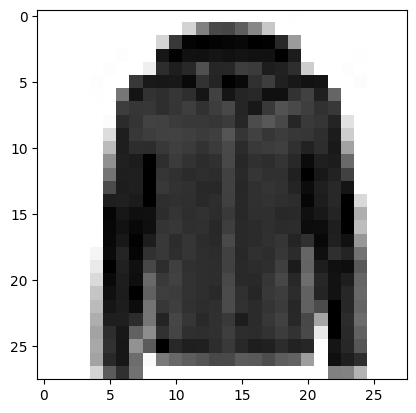

In [36]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [37]:
import numpy as np
print(np.unique(labels)) # Etiquetas
print(images.shape) # Tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [38]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

- En el cuaderno introductorio a redes neuronales con tensorflow se planteó la construcción de modelos mediante secuencia de capas:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ red1 (Dense)                    │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hred2 (Dense)                   │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

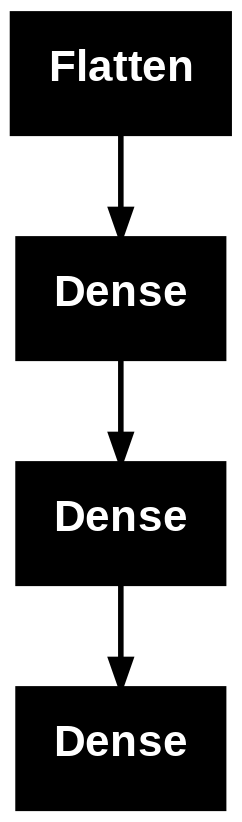

In [39]:
# Definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # Resumen del modelo
tf.keras.utils.plot_model(model) # Diagrama del modelo

- Aunque la implementacióm mediante secuencia es intuitiva, no permite realizar conexiones flexibles entre capas.

- En ese sentido, Keras permite crear capas bajo el principio de funciones y argumentos, como se muestra a continuación.

**Nota**: a diferencia de la estructura secuencial, en la API funcional se debe indicar la capa o capas de entrada y la capa o capas de salida para crear el grafo computacional de forma apropiada.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h1 (Dense)                      │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

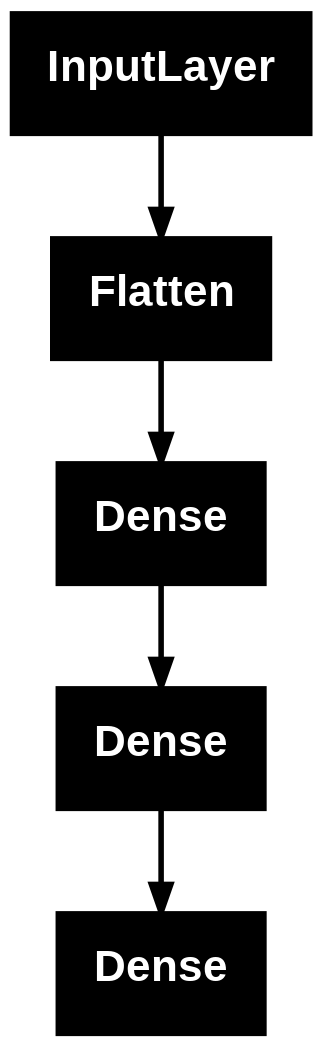

In [40]:
# ===Arquitectura funcional===
# Capa de entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')

# Capa de aplanamiento de las imágenes
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)# Argumento de entrada

# Capas densas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten) # Argumento de entrada
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)

# Capa de salida
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)

# Crear modelo según conexiones tipo funcionales
model_fun = tf.keras.Model(inputs=input_l,outputs=output)

# Resumen y gráfica del modelo
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


#**La API funcional permite realizar conexiones más flexibles**

- En el siguiente ejemplo se crea un modelo con una entrada y dos salidas con interconexiones flexibles:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ entrada             │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 784)       │          0 │ entrada[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h1 (Dense)          │ (None, 200)       │    157,000 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h2 (Dense)          │ (None, 50)        │     10,050 │ h1[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 834)       │          0 │ h2[0][0],         │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ outputA (Dense)     │ (None, 10)        │      8,350 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ outputB (Dense)     │ (None, 10)        │        510 │ h2[0][0]          │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 175,910 (687.15 KB)

 Trainable params: 175,910 (687.15 KB)

 Non-trainable params: 0 (0.00 B)

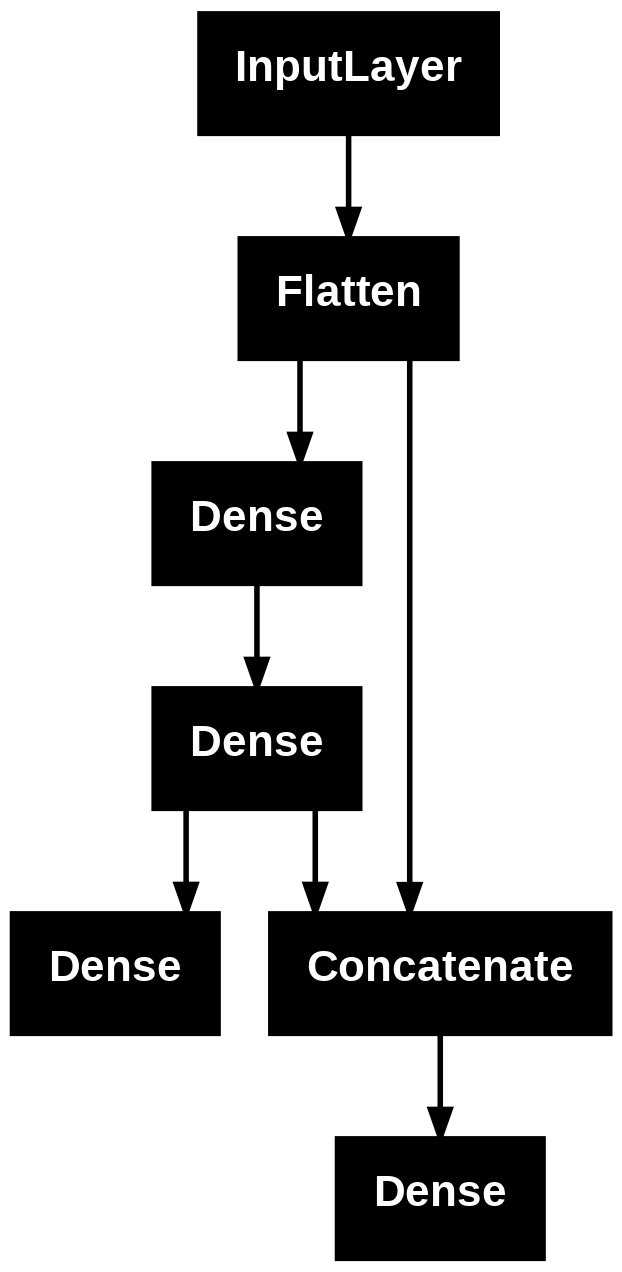

In [41]:
# Arquitectura funcional 2
tf.keras.backend.clear_session()

# Capa de Entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')

# Capa de Aplanamiento
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

# Capa Ocultas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)

# Capa que concatena características extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])

# Se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat) # Desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2) # Desde h2

# Las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])

model_fun.summary()
tf.keras.utils.plot_model(model_fun)

**Nota**: si se cuenta con varias salidas se puede definir un mismo costo para cada salida, o una lista con los costos requeridos. Además, en la lista `loss_weights` se puede especificar el valor del peso asociado al costo de cada salida en el intervalo [0,1].

In [42]:
model_fun.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy","accuracy"]) #f1, precision, recall, crossentropy


- El entrenamiento se realiza de igual forma al utilizado con el modelo secuencial.

- Como se fijaron dos salidas, se debe ingresar una lista para los argumentos ytrain.

In [43]:
history = model_fun.fit(Xtrain, [ytrain, ytrain] , epochs=10,batch_size=256,
                    validation_split=0.3) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 1.9957 - outputA_accuracy: 0.6335 - outputA_loss: 1.1086 - outputB_accuracy: 0.7089 - outputB_loss: 0.8870 - val_loss: 0.9942 - val_outputA_accuracy: 0.8213 - val_outputA_loss: 0.5050 - val_outputB_accuracy: 0.8230 - val_outputB_loss: 0.4877
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.8776 - outputA_accuracy: 0.8428 - outputA_loss: 0.4548 - outputB_accuracy: 0.8506 - outputB_loss: 0.4227 - val_loss: 0.8177 - val_outputA_accuracy: 0.8518 - val_outputA_loss: 0.4187 - val_outputB_accuracy: 0.8563 - val_outputB_loss: 0.3980
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.7827 - outputA_accuracy: 0.8599 - outputA_loss: 0.4017 - outputB_accuracy: 0.8647 - outputB_loss: 0.3810 - val_loss: 0.8050 - val_outputA_accuracy: 0.8497 - val_outputA_loss: 0.4082 - val_outputB_accuracy: 0.8525 - val_outputB_loss: 0.3959
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.7396 - outputA_accuracy: 0.8

- Se presentan las curvas de desempeño:

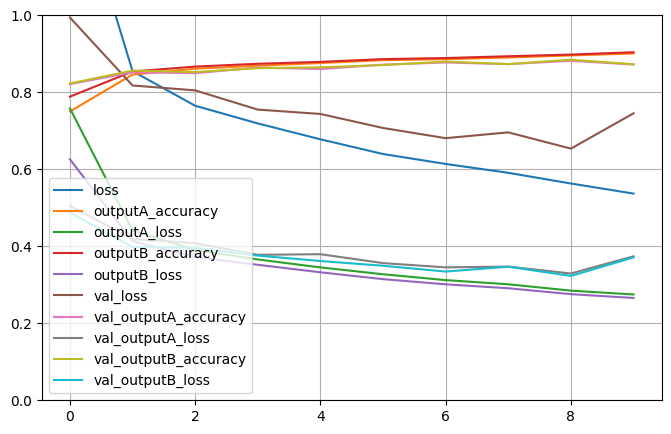

In [44]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

- Como el modelo generado presenta dos salidas, el rendimiento se discrimina por cada salida y el acumulado.

- A la hora de predecir la salida para una nueva muestra, se debe tener en cuenta la cantidad de salidas fijadas.

In [45]:
yestA, yestB = model_fun.predict(Xtest)
print(yestA.shape, yestB.shape) # Salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
(10000, 10) (10000, 10)


In [46]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

9 9


In [47]:
scoreA = model_fun.evaluate(Xtest,[ytest,ytest])#evaluacion
print(scoreA)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.7958 - outputA_accuracy: 0.8665 - outputA_loss: 0.3968 - outputB_accuracy: 0.8639 - outputB_loss: 0.3990
[0.8037161827087402, 0.40167295932769775, 0.401408851146698, 0.8601999878883362, 0.8618000149726868]


#**Grafiquemos los pesos respecto a las dimensiones de la imagen original**

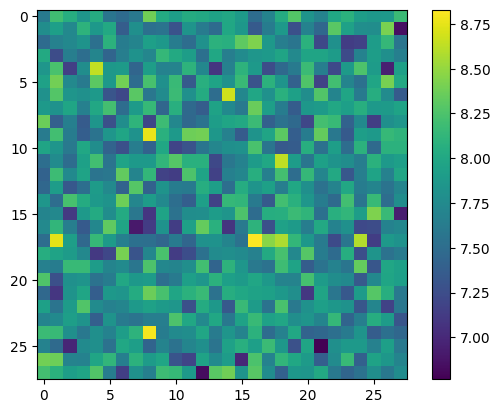

In [48]:
# Se busca identificar las entradas más relevantes para la red
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [49]:
model.layers[1].get_weights()[1].shape # Accediendo a los bias

(200,)

#**Salidas parciales de la red**

- La estrategia funcional nos permite acceder a partes intermedias de la red para encontrar mapas de características y verificar el aprendizaje de la representación.

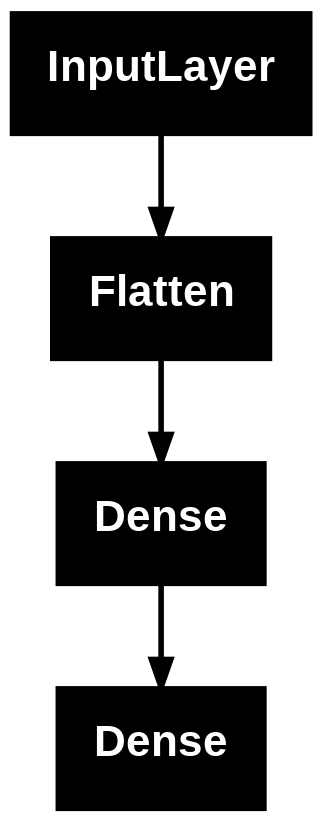

In [50]:
# Crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) # Se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # Modelo ya esta ajustado!


In [51]:
zB = model_B.predict(Xtest) # salida en h2
zB.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(10000, 50)

### Dado que se fijaron 50 unidades, se pueden utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D.


#**Principal Component Analysis (PCA)**

Reducción de dimensión lineal basado en la preservación de la varianza

![PCA1](https://www.soloentendidos.com/wp-content/uploads/2021/06/Principal-Component-Analysis-second-principal_thumb-1.gif)


![PCA2](https://1.bp.blogspot.com/-pgMAHiIWvuw/Tql5HIXNdRI/AAAAAAAABLI/I2zPF5cLRwQ/s1600/clust.gif)


#**t-student distributed Stochastic Neighbor Embedding (t-SNE)**

Reducción de dimensión basado en la preservación de localidades (vecinos) utilizando medidas de información desde estimación no paramétrica de probabilidad en el espación de alta y baja dimensión, respectivamente.

![tsne](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)

![tsne2](https://3.bp.blogspot.com/-NE01azL_JxU/Wxli17oYNzI/AAAAAAAACxQ/axOI2yy-Ft0QbqaekOyemm5Xn0wAFvRUwCLcBGAs/s640/image2.gif)

In [52]:
from sklearn.decomposition import PCA
zBpca = PCA(n_components=2).fit_transform(zB)
zBpca.shape

(10000, 2)

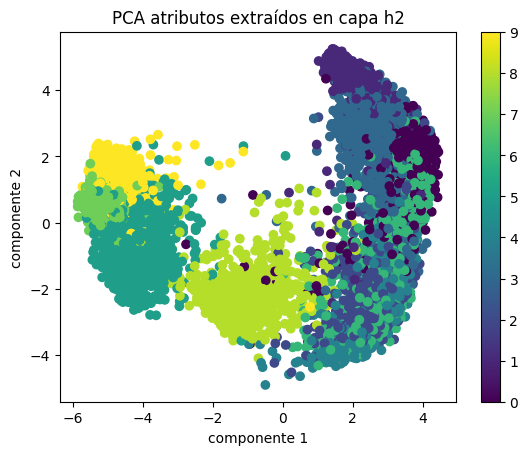

In [53]:
plt.scatter(zBpca[:,0],zBpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')
plt.show()

In [54]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

- También, podemos revisar la distribución de las imágenes en el espacio proyectado:

Text(0.5, 1.0, 'PCA atributos extraídos en capa h2')

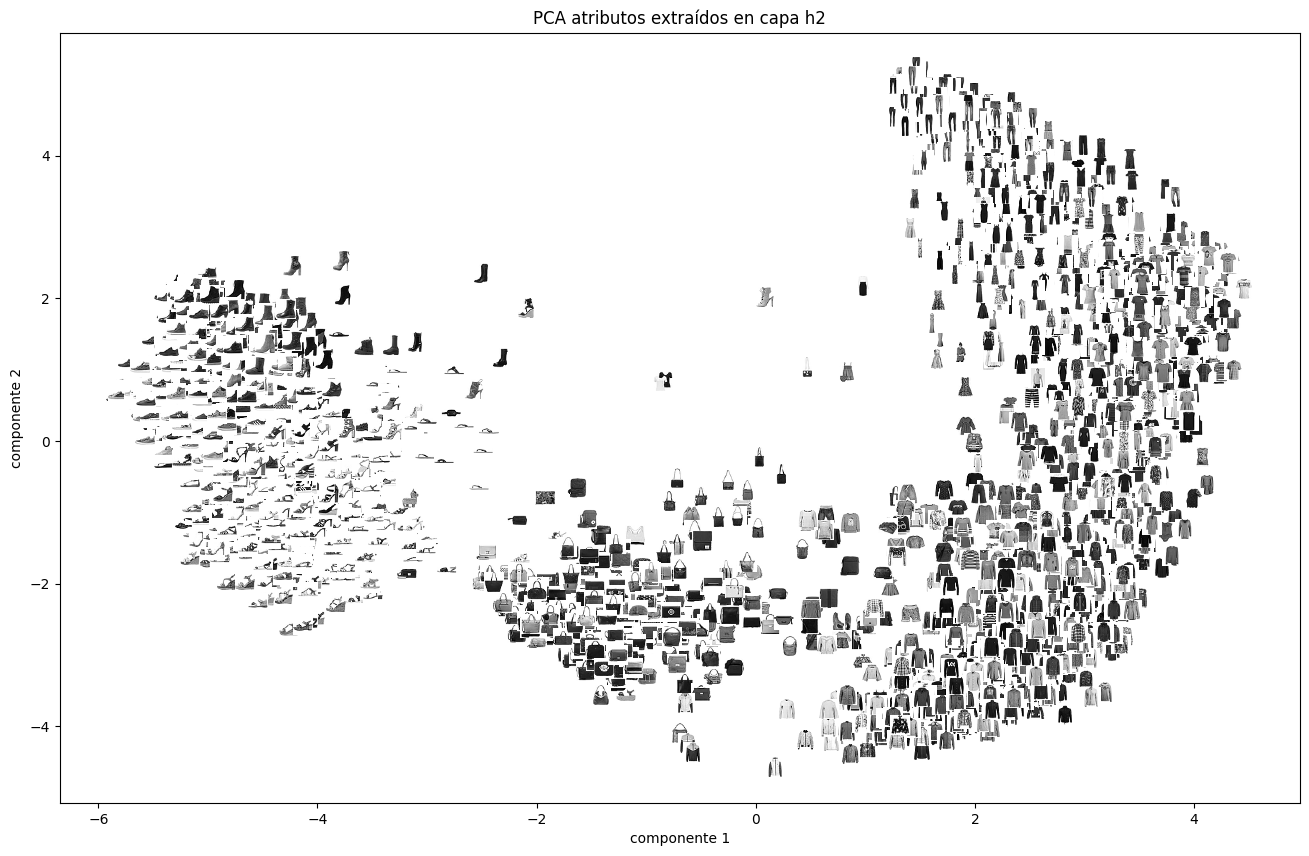

In [55]:
Ni = 4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zBpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')

#**Ejercicio:**

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

- Repita el proceso aplicando la técnica de reducción de dimensión [UMAP de RAPIDS](https://developer.nvidia.com/blog/even-faster-and-more-scalable-umap-on-the-gpu-with-rapids-cuml/).

- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

## **PCA en Capa de Concatenación**
Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

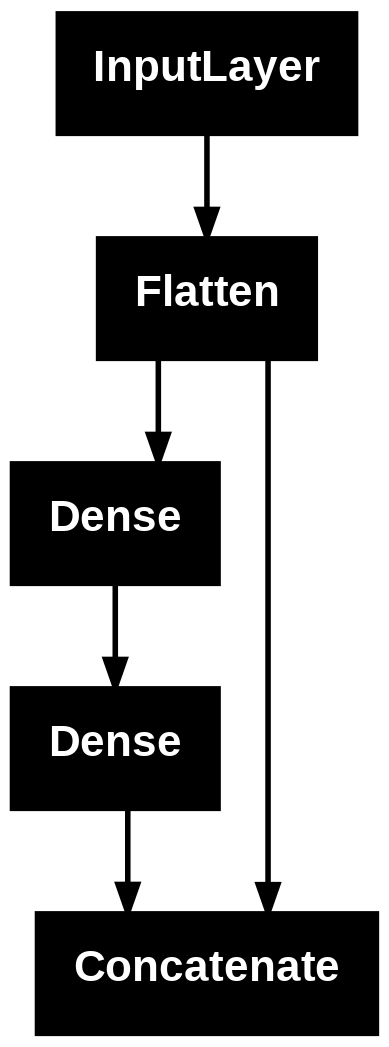

In [56]:
# Crear nuevo modelo con salida parcial
model_A = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('concatenate').output) # Se accede a capas por nombre
tf.keras.utils.plot_model(model_A) # Modelo ya esta ajustado!


In [57]:
zA = model_A.predict(Xtest) # salida en h2
zA.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 834)

In [58]:
from sklearn.decomposition import PCA
zApca = PCA(n_components=2).fit_transform(zA)
zApca.shape

(10000, 2)

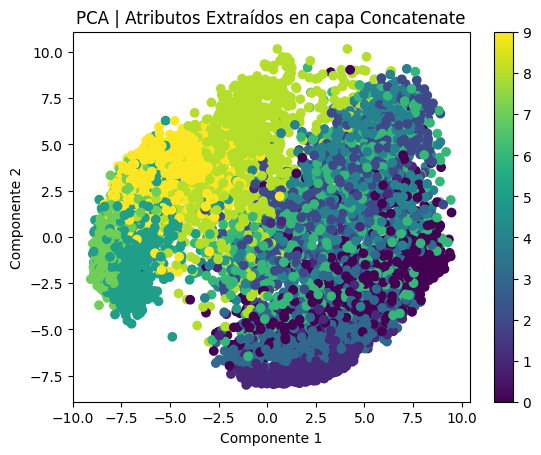

In [75]:
plt.scatter(zApca[:,0],zApca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA | Atributos Extraídos en capa Concatenate')
plt.show()

Text(0.5, 1.0, 'PCA | Atributos Extraídos en Capa Concatenate')

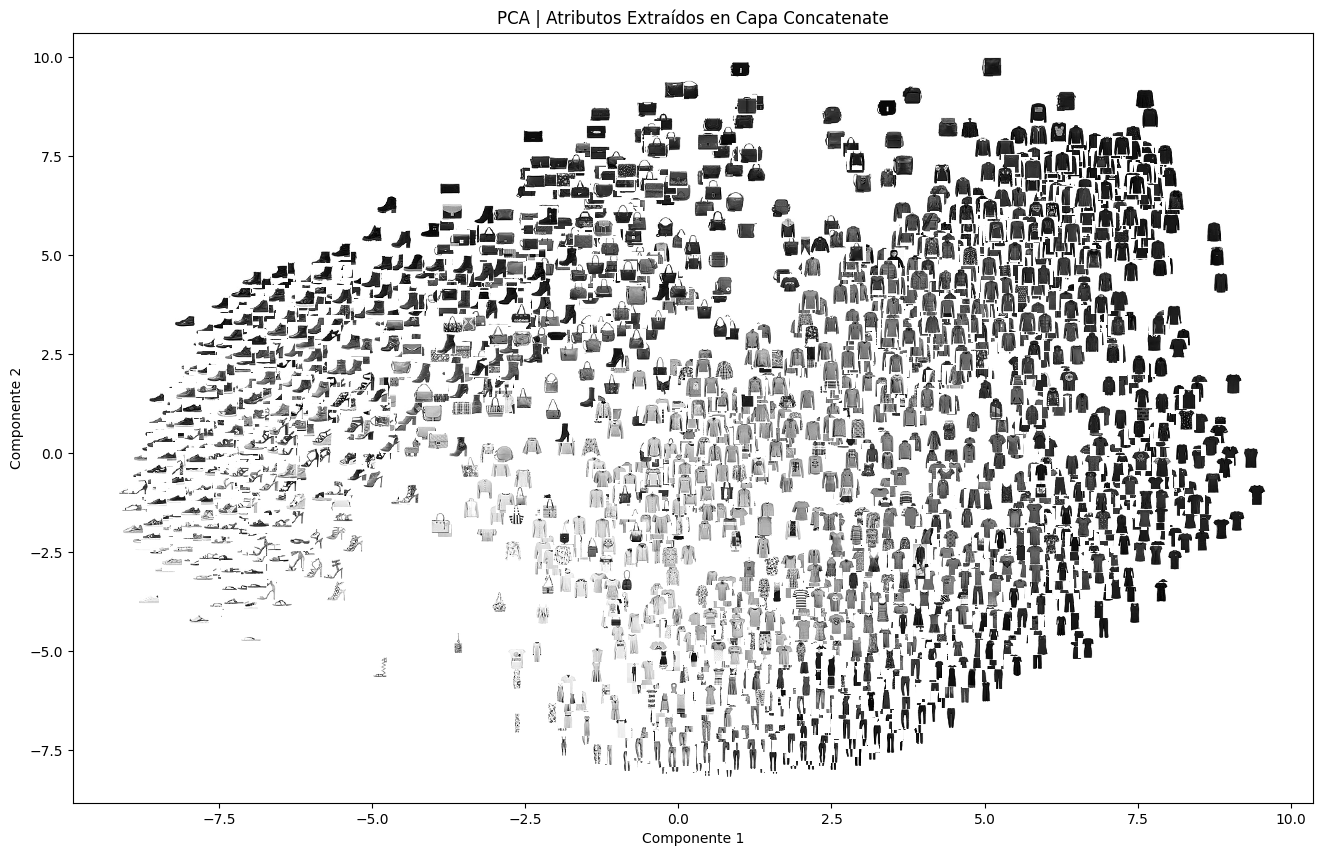

In [73]:
Ni = 4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zApca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA | Atributos Extraídos en Capa Concatenate')

##**UMAP en Capas H2 y Concatenación**
- Repita el proceso aplicando la técnica de reducción de dimensión [UMAP de RAPIDS](https://developer.nvidia.com/blog/even-faster-and-more-scalable-umap-on-the-gpu-with-rapids-cuml/).



###**Capa H2**

In [100]:
from cuml.manifold.umap import UMAP

zBumap = UMAP(n_neighbors=50, min_dist=0.75).fit_transform(zB)
zBumap.shape

[2025-11-09 23:39:55.712] [CUML] [info] Building knn graph using brute force


(10000, 2)

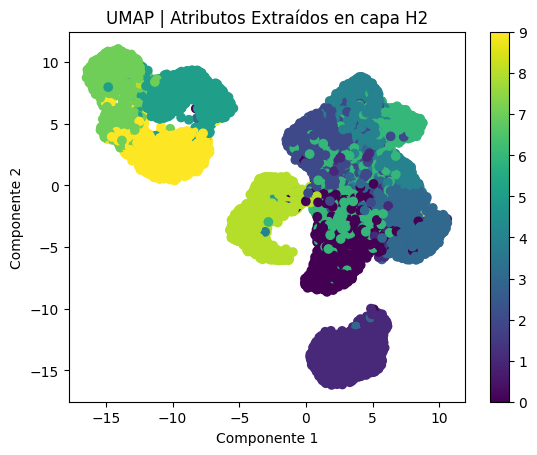

In [101]:
plt.scatter(zBumap[:,0], zBumap[:,1], c=ytest)
plt.colorbar()
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('UMAP | Atributos Extraídos en capa H2')
plt.show()

Text(0.5, 1.0, 'UMAP | Atributos extraídos en capa H2')

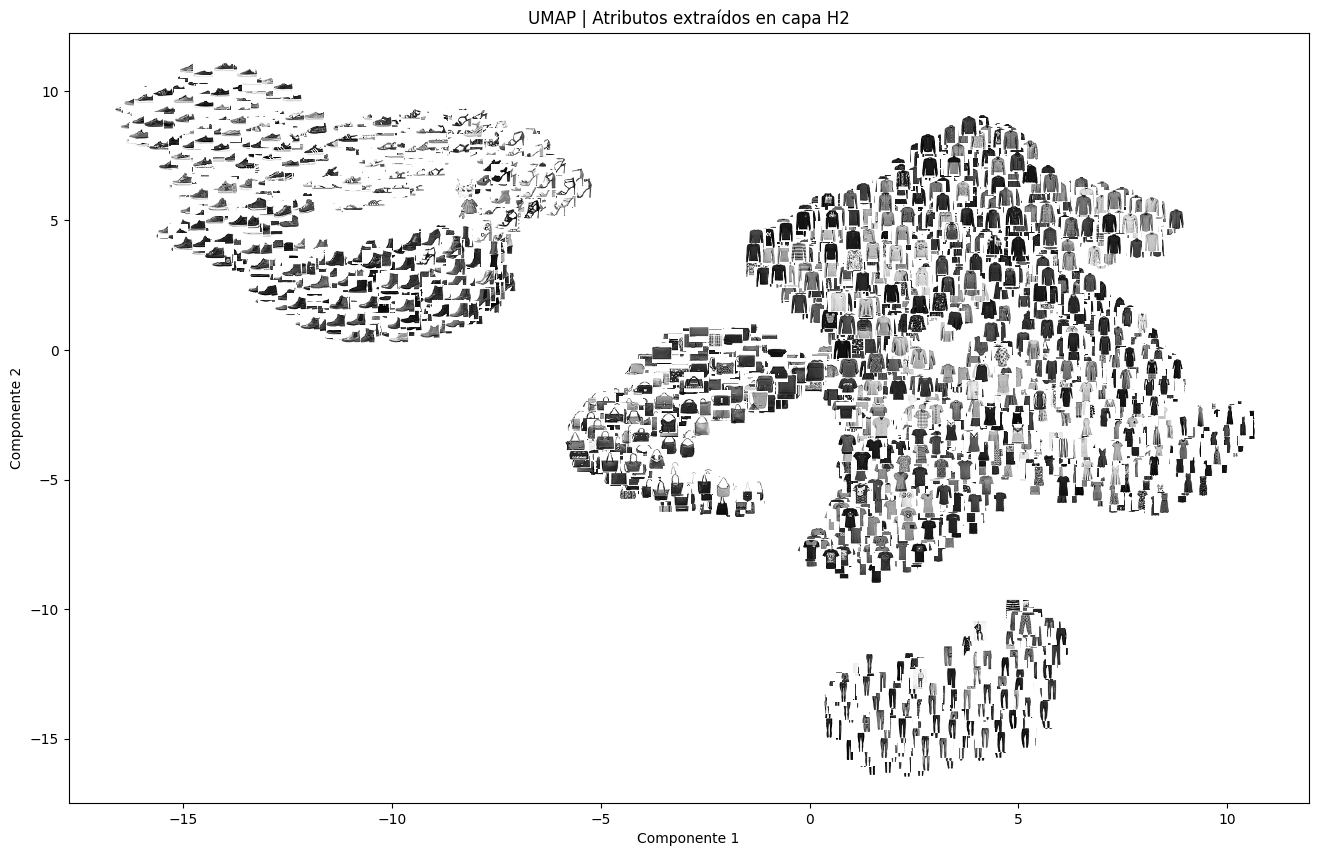

In [102]:
Ni = 4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0, ytest.shape[0], Ni)
plot_mnist_2d(zBumap[ind], ytest[ind], Xtest[ind], img_w=28, img_h=28, zoom=0.5, cmap='binary')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('UMAP | Atributos extraídos en capa H2')

###**Capa Concatenate**

In [97]:
zAumap = UMAP(n_neighbors=50, min_dist=0.75).fit_transform(zA)
zAumap.shape

[2025-11-09 23:39:05.966] [CUML] [info] Building knn graph using brute force


(10000, 2)

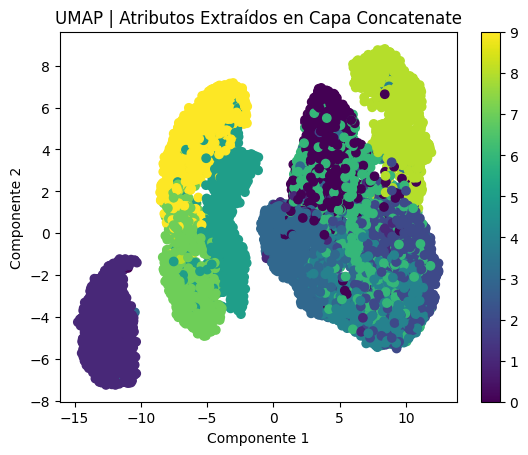

In [98]:
plt.scatter(zAumap[:,0], zAumap[:,1],c=ytest)
plt.colorbar()
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('UMAP | Atributos Extraídos en Capa Concatenate')
plt.show()

Text(0.5, 1.0, 'UMAP | Atributos Extraídos en Capa Concatenate')

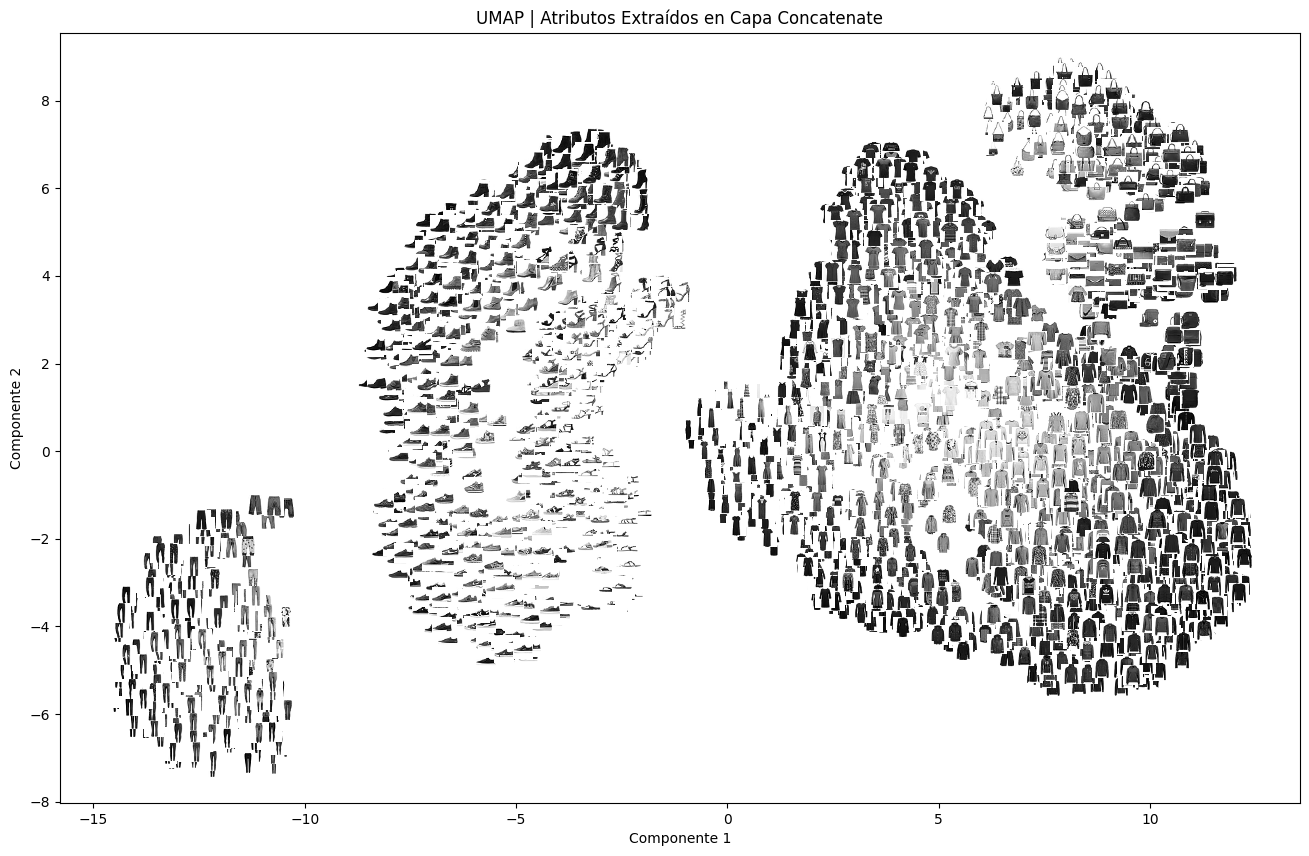

In [99]:
Ni = 4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0, ytest.shape[0], Ni)
plot_mnist_2d(zAumap[ind], ytest[ind], Xtest[ind], img_w=28, img_h=28, zoom=0.5, cmap='binary')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('UMAP | Atributos Extraídos en Capa Concatenate')

#**Nueva Arquitectura**
- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

In [113]:
# ===== Ayuda de código =====
# Cargar Digits MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-5000], X_train[-5000:]
y_train, y_valid = y_train[:-5000], y_train[-5000:]

X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape, X_valid.shape, X_test.shape)

(55000, 28, 28, 1) (5000, 28, 28, 1) (10000, 28, 28, 1)


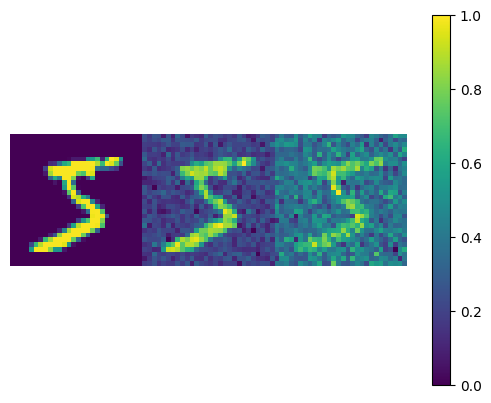

In [114]:
# Crear Entradas Con y Sin ruido
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01, 0.1]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

# Recorrer varianzas
for var_i in var_:
    dim = X_train.shape

    # Definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T # Fijar Señal con Ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]


plt.imshow(np.c_[inputs_train[0][0,:,:,0],inputs_train[1][0,:,:,0],inputs_train[2][0,:,:,0]])
plt.axis('off')
plt.colorbar()
plt.show()

In [115]:
# Vector de Salida Par o Impar
yTrainEvenOdd = (y_train % 2)
yValidEvenOdd = (y_valid % 2)
yTestEvenOdd = (y_test % 2)
print(yTrainEvenOdd[10:])
print(y_train[10:])

print(X_train.shape[1:])

[1 1 1 ... 0 0 0]
[3 5 3 ... 0 4 0]
(28, 28, 1)


Model: "MNIST_Digits_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ cleanImages         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NoisyImages1        │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NoisyImages2        │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_conv1         │ (None, 28, 28,    │      3,200 │ cleanImages[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_conv1        │ (None, 28, 28,    │      3,200 │ NoisyImages1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy2_conv1        │ (None, 28, 28,    │      3,200 │ NoisyImages2[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_pool1         │ (None, 14, 14,    │          0 │ clean_conv1[0][0] │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_pool1        │ (None, 14, 14,    │          0 │ noisy1_conv1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy2_pool1        │ (None, 14, 14,    │          0 │ noisy2_conv1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_conv2         │ (None, 14, 14,    │     73,856 │ clean_pool1[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_conv2        │ (None, 14, 14,    │     73,856 │ noisy1_pool1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy2_conv2        │ (None, 14, 14,    │     73,856 │ noisy2_pool1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_pool2         │ (None, 7, 7, 128) │          0 │ clean_conv2[0][0] │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_pool2        │ (None, 7, 7, 128) │          0 │ noisy1_conv2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy2_pool2        │ (None, 7, 7, 128) │          0 │ noisy2_conv2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_conv3         │ (None, 7, 7, 256) │    295,168 │ clean_pool2[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_conv3        │ (None, 7, 7, 256) │    295,168 │ noisy1_pool2[0][

 Total params: 2,012,268 (7.68 MB)

 Trainable params: 2,012,268 (7.68 MB)

 Non-trainable params: 0 (0.00 B)

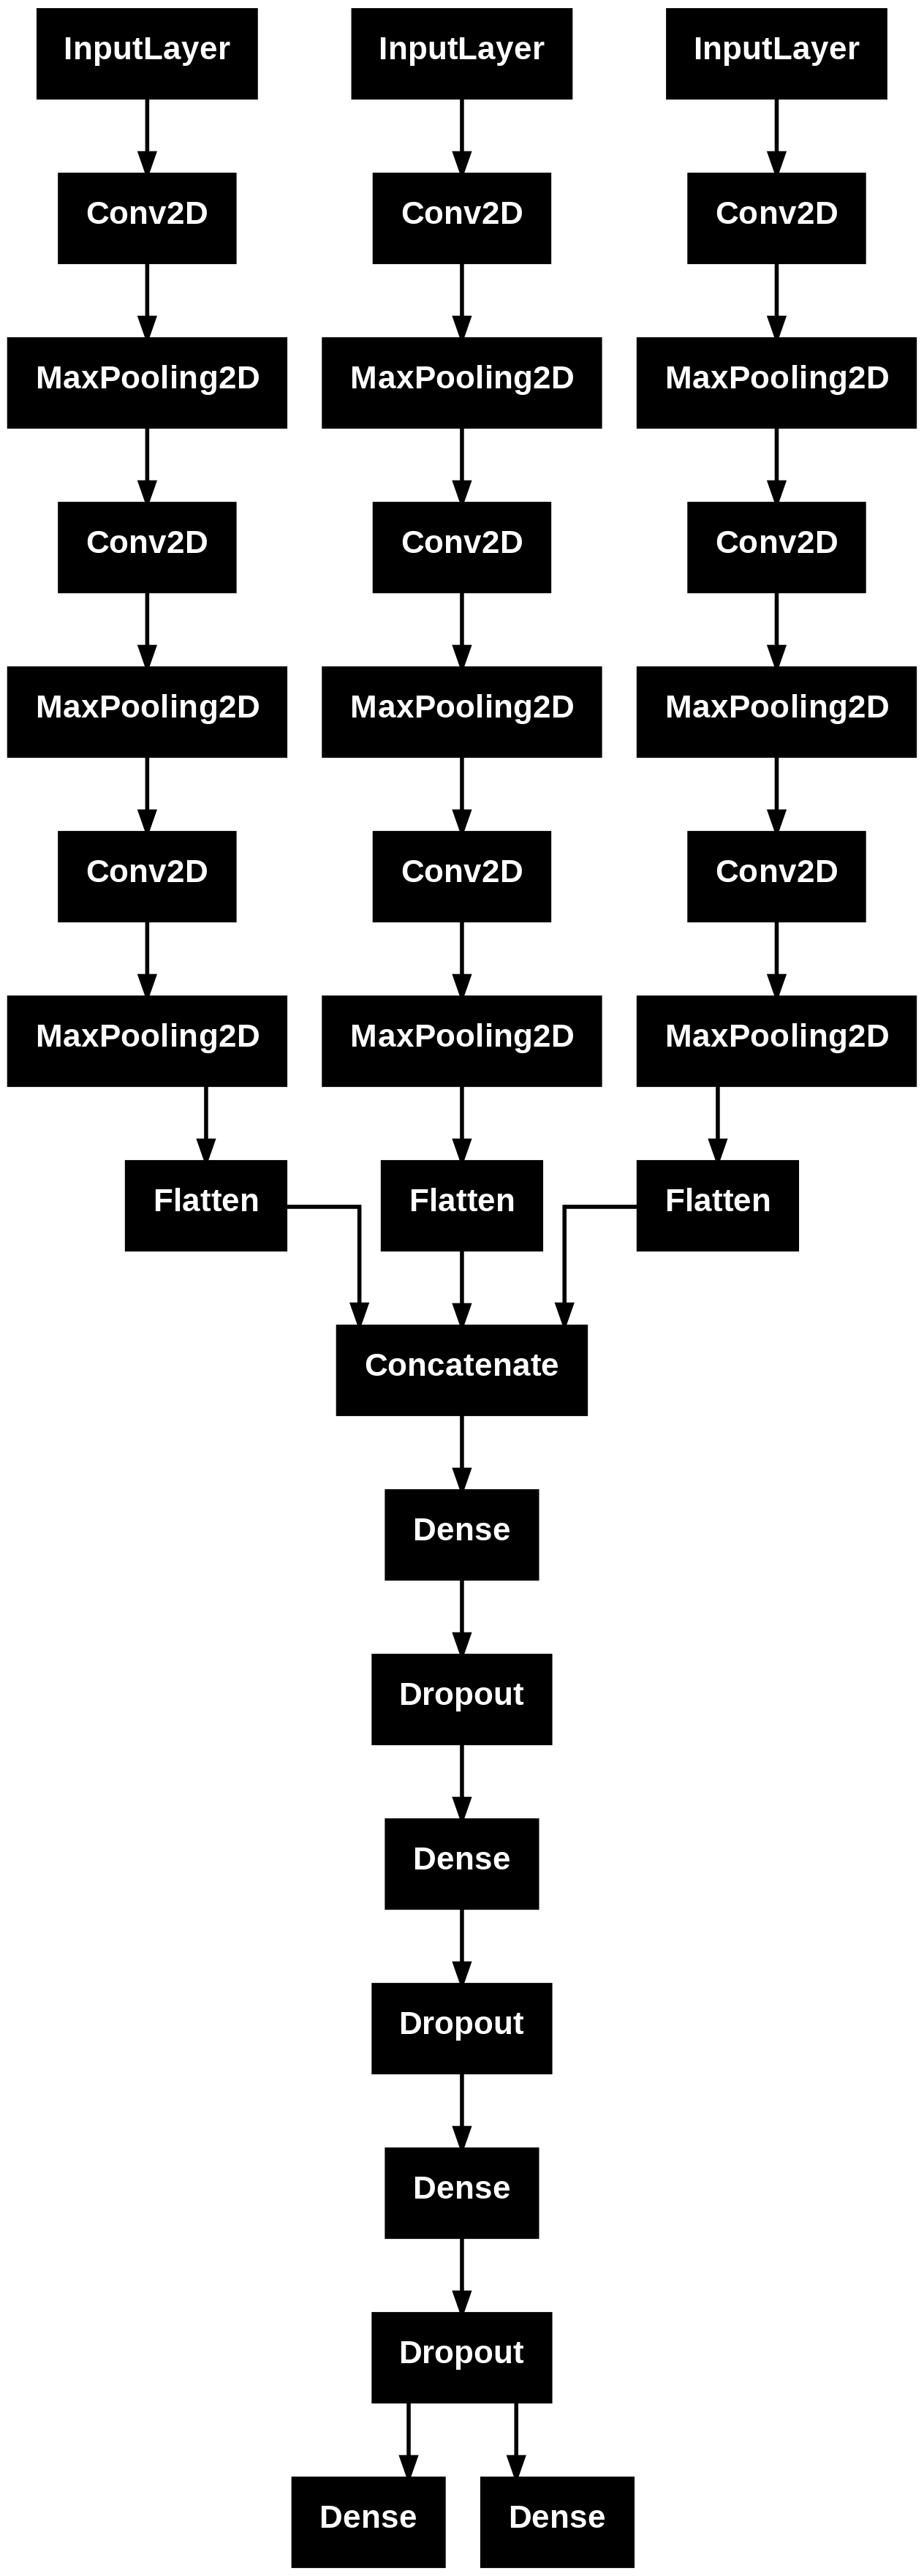

In [116]:
import tensorflow as tf
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Concatenate,
                                     Dense, Dropout, BatchNormalization, ReLU)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from functools import partial

tf.keras.backend.clear_session()

inputShape = X_train.shape[1:]

# === Inicializadores y regularizadores ===
initializer = 'he_normal'
regularizer = tf.keras.regularizers.l2(1e-4)

# === Capas de entrada ===
cleanInput = Input(shape=inputShape, name='cleanImages')
noisyInput1 = Input(shape=inputShape, name='NoisyImages1')
noisyInput2 = Input(shape=inputShape, name='NoisyImages2')

# === Definición de Conv2D por defecto ===
DefaultConv2D = partial(
    Conv2D,
    kernel_size=3,
    padding="same",
    use_bias=False,  # Se recomienda apagar bias si hay BatchNorm
    kernel_initializer=initializer,
    kernel_regularizer=regularizer
)

# === Rama convolucional ===
def cnnBranch(x, prefix):
    conv1 = DefaultConv2D(filters=64, kernel_size=7, name=f"{prefix}_conv1")(x)
    bn1 = BatchNormalization(name=f"{prefix}_bn1")(conv1)
    act1 = ReLU(name=f"{prefix}_relu1")(bn1)
    pool1 = MaxPooling2D(pool_size=2, name=f"{prefix}_pool1")(act1)

    conv2 = DefaultConv2D(filters=128, name=f"{prefix}_conv2")(pool1)
    bn2 = BatchNormalization(name=f"{prefix}_bn2")(conv2)
    act2 = ReLU(name=f"{prefix}_relu2")(bn2)
    pool2 = MaxPooling2D(pool_size=2, name=f"{prefix}_pool2")(act2)

    conv3 = DefaultConv2D(filters=256, name=f"{prefix}_conv3")(pool2)
    bn3 = BatchNormalization(name=f"{prefix}_bn3")(conv3)
    act3 = ReLU(name=f"{prefix}_relu3")(bn3)
    pool3 = MaxPooling2D(pool_size=2, name=f"{prefix}_pool3")(act3)

    flatten = Flatten(name=f"{prefix}_flatten")(pool3)
    return flatten

# === Tres ramas convolucionales ===
cleanBranch = cnnBranch(cleanInput, "clean")
noisyBranch1 = cnnBranch(noisyInput1, "noisy1")
noisyBranch2 = cnnBranch(noisyInput2, "noisy2")

# === Fusión de características ===
merged = Concatenate(name="merged")([cleanBranch, noisyBranch1, noisyBranch2])

# === Capas densas con normalización y regularización ===
def denseBlock(x, units, name):
    x = Dense(units, use_bias=False, kernel_initializer=initializer,
              kernel_regularizer=regularizer, name=f"{name}_dense")(x)
    x = BatchNormalization(name=f"{name}_bn")(x)
    x = ReLU(name=f"{name}_relu")(x)
    x = Dropout(0.4, name=f"{name}_drop")(x)
    return x

h1 = denseBlock(merged, 128, "block1")
h2 = denseBlock(h1, 64, "block2")
h3 = denseBlock(h2, 32, "block3")

# === Salidas ===
digitOutput = Dense(10, activation="softmax", name="digitOutput")(h3)
evenOddOutput = Dense(2, activation="softmax", name="evenOddOutput")(h3)

# === Modelo ===
model = Model(inputs=[cleanInput, noisyInput1, noisyInput2],
              outputs=[digitOutput, evenOddOutput])

# === Compilación ===
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss={
        "digitOutput": "sparse_categorical_crossentropy",
        "evenOddOutput": "sparse_categorical_crossentropy"
    },
    loss_weights={"digitOutput": 1.0, "evenOddOutput": 0.5},
    metrics=["accuracy"]
)

model.summary()

modelCNN.summary()
tf.keras.utils.plot_model(modelCNN)

In [ ]:
# Compilación del Modelo
model.compile(
    optimizer="adam",
    loss={
        "digitOutput": "sparse_categorical_crossentropy",
        "evenOddOutput": "sparse_categorical_crossentropy"
        },
    metrics=["accuracy"]
    )

# Entrenamiento del Modelo
history = model.fit(
    inputs_train,
    {"digitOutput": y_train, "evenOddOutput": yTrainEvenOdd},
    validation_data=(inputs_valid,
                     {"digitOutput": y_valid, "evenOddOutput": yValidEvenOdd}),
    epochs=10,
    batch_size=512
)

In [71]:
# Evaluación del Modelo
testMetrics = model.evaluate(
    inputs_test,
    {"digitOutput": y_test, "evenOddOutput": yTestEvenOdd}
)